In [1]:
import numpy as np
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
import geone
import geone.covModel as gcm
import geone.imgplot3d as imgplt3
import pyvista as pv
import sys
import os

sys.path.append("../../../")
#my modules
from ArchPy.base import *
from ArchPy.tpgs import *

In [2]:
#grid
sx = 1.5
sy = 1.5
sz = .15
x0 = 0
y0 = 0
z0 = -15
nx = 140
ny = 70
nz = 70
x1 = x0 + nx*sx
y1 = y0 + ny*sy
z1 = z0 + nz

dimensions = (nx, ny, nz)
spacing = (sx, sy, sz)
origin = (x0, y0, z0)  

domain = np.ones([ny,nx],dtype=bool)

In [3]:
## create pile

P1 = Pile(name = "P1",seed=1)
PD = Pile(name = "PD",seed=1)

#units covmodel
covmodelD = gcm.CovModel2D(elem=[('cubic', {'w':0.6, 'r':[30,30]})])
covmodelD1 = gcm.CovModel2D(elem=[('cubic', {'w':0.2, 'r':[30,30]})])
covmodelC = gcm.CovModel2D(elem=[('cubic', {'w':0.2, 'r':[40,40]})])
covmodelB = gcm.CovModel2D(elem=[('cubic', {'w':0.6, 'r':[30,30]})])
covmodel_er = gcm.CovModel2D(elem=[('spherical', {'w':1, 'r':[50,50]})])

## facies covmodel
covmodel_SIS_C = gcm.CovModel3D(elem=[("exponential", {"w":.21,"r":[50, 50, 10]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B1 = gcm.CovModel3D(elem=[("exponential", {"w":.16,"r":[50, 50, 2]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B2 = gcm.CovModel3D(elem=[("exponential", {"w":.24,"r":[100, 100, 3]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B3 = gcm.CovModel3D(elem=[("exponential", {"w":.19,"r":[50, 50, 2]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B4 = gcm.CovModel3D(elem=[("exponential", {"w":.13,"r":[100, 100, 4]})], alpha=0, name="vario_SIS") # input variogram

lst_covmodelC=[covmodel_SIS_C] # list of covmodels to pass at the function
lst_covmodelB=[covmodel_SIS_B1, covmodel_SIS_B2, covmodel_SIS_B3, covmodel_SIS_B4] # list of covmodels to pass


#create Lithologies 
dic_s_D2 = {"int_method" : "grf_ineq","covmodel" : covmodelD1}
dic_f_D2 = {"f_method":"homogenous"}
D2 = Unit(name="D2",order=1,ID = 10,color="goldenrod",contact="onlap",surface=Surface(contact="onlap",dic_surf=dic_s_D2),
          dic_facies=dic_f_D2)
dic_s_D1 = {"int_method" : "grf_ineq","covmodel" : covmodelD1, "mean":-6.5}
dic_f_D1 = {"f_method":"homogenous"}
D1 = Unit(name="D1",order=2,ID = 11,color="palegoldenrod",contact="onlap",surface=Surface(contact="onlap",dic_surf=dic_s_D1)
            ,dic_facies=dic_f_D1)


PD.add_unit([D1,D2])

dic_s_D = {"int_method" : "grf_ineq","covmodel" : covmodelD}
dic_f_D = {"f_method":"SubPile", "SubPile":PD}
D = Unit(name="D",order=1,ID = 1,color="gold",contact="onlap",surface=Surface(contact="onlap",dic_surf=dic_s_D)
         ,dic_facies=dic_f_D)

dic_s_C = {"int_method" : "grf_ineq","covmodel" : covmodelC, "mean":-7}
dic_f_C = {"f_method" : "SIS","neig" : 10, "f_covmodel":lst_covmodelC, "probability":[0.3, 0.7]}
C = Unit(name="C", order=2, ID = 2, color="blue", contact="onlap", dic_facies=dic_f_C, surface=Surface(dic_surf=dic_s_C, contact="onlap"))

dic_s_B = {"int_method" : "grf_ineq","covmodel" : covmodelB, "mean":-8.5}
dic_f_B = {"f_method":"SIS", "neig" : 10, "f_covmodel":lst_covmodelB, "probability":[0.2, 0.4, 0.25, 0.15]}
B = Unit(name="B",order=3,ID = 3,color="purple",contact="onlap",dic_facies=dic_f_B,surface=Surface(contact="onlap",dic_surf=dic_s_B))

dic_s_A = {"int_method":"grf_ineq","covmodel": covmodelB, "mean":-11}
dic_f_A = {"f_method":"homogenous"}
A = Unit(name="A",order=5,ID = 5,color="red",contact="onlap",dic_facies=dic_f_A,surface=Surface(dic_surf = dic_s_A,contact="onlap"))

#Master pile
P1.add_unit([D,C,B,A])

Unit D2: Surface added for interpolation
Unit D1: Surface added for interpolation
Stratigraphic unit D1 added
Stratigraphic unit D2 added
Unit D: Surface added for interpolation
Unit C: Surface added for interpolation
Unit B: Surface added for interpolation
Unit A: Surface added for interpolation
Stratigraphic unit D added
Stratigraphic unit C added
Stratigraphic unit B added
Stratigraphic unit A added


In [4]:
# covmodels for the property model
covmodelK = gcm.CovModel3D(elem=[("exponential",{"w":0.3,"r":[30,30,10]})],alpha=-20,name="K_vario")
covmodelK2 = gcm.CovModel3D(elem=[("spherical",{"w":0.1,"r":[20,20, 5]})],alpha=0,name="K_vario_2")

facies_1 = Facies(ID = 1,name="Sand",color="yellow")
facies_2 = Facies(ID = 2,name="Gravel",color="lightgreen")
facies_3 = Facies(ID = 3,name="GM",color="blueviolet")
facies_4 = Facies(ID = 4,name="Clay",color="blue")
facies_5 = Facies(ID = 5,name="SM",color="brown")
facies_6 = Facies(ID = 6,name="Silt",color="goldenrod")
facies_7 = Facies(ID = 7,name="basement",color="red")

A.add_facies([facies_7])
B.add_facies([facies_1, facies_2, facies_3, facies_5])
D.add_facies([facies_1, facies_5])
D1.add_facies([facies_1])
D2.add_facies([facies_5])
C.add_facies([facies_4, facies_6])

# property model
cm_prop1 = gcm.CovModel3D(elem = [("spherical", {"w":0.1, "r":[10,10,10]}),
                                  ("cubic", {"w":0.1, "r":[15,15,15]})])
cm_prop2 = gcm.CovModel3D(elem = [("cubic", {"w":0.2, "r":[25, 25, 5]})])

list_facies = [facies_1, facies_2, facies_3, facies_4, facies_5, facies_6, facies_7]
list_covmodels = [cm_prop2, cm_prop1, cm_prop2, cm_prop1, cm_prop2, cm_prop1, cm_prop2]
means = [-4, -2, -6, -9, -6, -7, -19]
prop_model = ArchPy.base.Prop("K",
                              facies = list_facies,
                              covmodels = list_covmodels,
                                means = means,
                                int_method = "sgs",
                                vmin = -10,
                                vmax = -1
                                )



Facies basement added to unit A
Facies Sand added to unit B
Facies Gravel added to unit B
Facies GM added to unit B
Facies SM added to unit B
Facies Sand added to unit D
Facies SM added to unit D
Facies Sand added to unit D1
Facies SM added to unit D2
Facies Clay added to unit C
Facies Silt added to unit C


In [5]:
top = np.ones([ny,nx])*-6
bot = np.ones([ny,nx])*z0

In [6]:
T1 = Arch_table(name = "P1",seed=3)
T1.set_Pile_master(P1)
T1.add_grid(dimensions, spacing, origin, top=top,bot=bot, polygon=domain)
T1.add_prop(prop_model)

Pile sets as Pile master
## Adding Grid ##
## Grid added and is now simulation grid ##
Property K added


In [7]:
T1.compute_surf(3)
T1.compute_facies(1)
T1.compute_prop(1)

Boreholes not processed, fully unconditional simulations will be tempted
########## PILE P1 ##########
Pile P1: ordering units
Stratigraphic units have been sorted according to order
Discrepency in the orders for units A and B
Changing orders for that they range from 1 to n

#### COMPUTING SURFACE OF UNIT A
A: time elapsed for computing surface 0.029891490936279297 s

#### COMPUTING SURFACE OF UNIT B
B: time elapsed for computing surface 0.02692723274230957 s

#### COMPUTING SURFACE OF UNIT C
C: time elapsed for computing surface 0.027924776077270508 s

#### COMPUTING SURFACE OF UNIT D
D: time elapsed for computing surface 0.0 s

Time elapsed for getting domains 0.09674072265625 s

#### COMPUTING SURFACE OF UNIT A
A: time elapsed for computing surface 0.025931119918823242 s

#### COMPUTING SURFACE OF UNIT B
B: time elapsed for computing surface 0.028922080993652344 s

#### COMPUTING SURFACE OF UNIT C
C: time elapsed for computing surface 0.02991962432861328 s

#### COMPUTING SURFACE OF

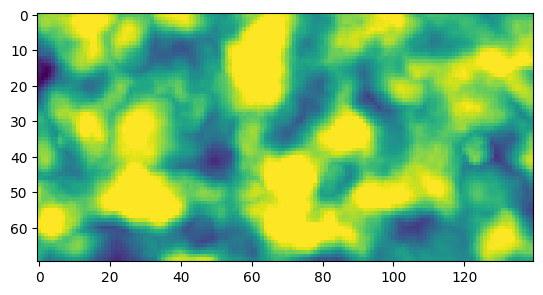

In [26]:
plt.imshow(T1.Geol.surfaces_by_piles["PD"][1, 1])

In [ ]:
T1.plot_facies()

Widget(value='<iframe src="http://localhost:65190/index.html?ui=P_0x173a29605d0_0&reconnect=auto" class="pyvis…

Exception raised
ClientConnectionResetError('Cannot write to closing transport')
Traceback (most recent call last):
  File "c:\Users\schorppl\AppData\Local\miniconda3\envs\bebou\Lib\site-packages\wslink\protocol.py", line 323, in onCompleteMessage
    await self.sendWrappedMessage(
  File "c:\Users\schorppl\AppData\Local\miniconda3\envs\bebou\Lib\site-packages\wslink\protocol.py", line 427, in sendWrappedMessage
    await ws.send_bytes(chunk)
  File "c:\Users\schorppl\AppData\Local\miniconda3\envs\bebou\Lib\site-packages\aiohttp\web_ws.py", line 394, in send_bytes
    await self._writer.send(data, binary=True, compress=compress)
  File "c:\Users\schorppl\AppData\Local\miniconda3\envs\bebou\Lib\site-packages\aiohttp\http_websocket.py", line 748, in send
    await self._send_frame(message, WSMsgType.BINARY, compress)
  File "c:\Users\schorppl\AppData\Local\miniconda3\envs\bebou\Lib\site-packages\aiohttp\http_websocket.py", line 698, in _send_frame
    self._write(header + message)
  File

In [ ]:
T1.plot_units()

Widget(value='<iframe src="http://localhost:65190/index.html?ui=P_0x173a6be54d0_1&reconnect=auto" class="pyvis…

In [ ]:
import flopy as fp
import ArchPy.ap_mf
from ArchPy.ap_mf import archpy2modflow, array2cellids

In [ ]:
archpy_flow = archpy2modflow(T1, exe_name="../../../../../exe/mf6.exe", model_dir="reference")  # create the modflow model
archpy_flow.create_sim(grid_mode="layers", iu=0)  # create the simulation object and choose a certain discretization
archpy_flow.set_k("K", iu=0, ifa=0, ip=0, log=True)  # set the hydraulic conductivity

Simulation created
To retrieve the simulation, use the get_sim() method


### Construct modflow model

In [ ]:
sim = archpy_flow.get_sim()
gwf = archpy_flow.get_gwf()

#### BC

In [ ]:
# add BC at left and right on all layers
h1 = 1
h2 = 0
chd_data = []

a = np.zeros((gwf.modelgrid.nlay, gwf.modelgrid.nrow, gwf.modelgrid.ncol), dtype=bool)
a[:, :, 0] = 1
lst_chd = array2cellids(a, gwf.dis.idomain.array)
for cellid in lst_chd:
    chd_data.append((cellid, h1))

a = np.zeros((gwf.modelgrid.nlay, gwf.modelgrid.nrow, gwf.modelgrid.ncol), dtype=bool)
a[:, :, -1] = 1
lst_chd = array2cellids(a, gwf.dis.idomain.array)
for cellid in lst_chd:
    chd_data.append((cellid, h2))

chd = fp.mf6.ModflowGwfchd(gwf, stress_period_data=chd_data, save_flows=True)

#### Observations for inverse

In [ ]:
obs_recarray = {
    "head_obs_ref.csv": [(("h1","HEAD",(3, 13, 25))), ("h2", "HEAD", (3, 25, 50)), ("h3", "HEAD", (3, 45, 80)), (("h4","HEAD",(3, 33, 110))), 
                         (("h5","HEAD",(3, 63, 130)))]
}
obs_package = fp.mf6.ModflowUtlobs(
    gwf,
    pname="head_obs",
    filename="{}.obs".format(gwf.name),
    digits=5,
    print_input=True,
    continuous=obs_recarray,
)

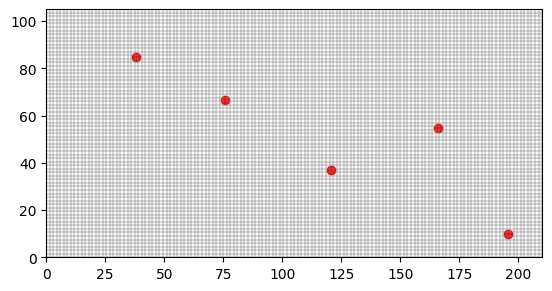

In [ ]:
grid = gwf.modelgrid
plt.scatter(
    [grid.xcellcenters[cell[2][1], cell[2][2]] for cell in obs_recarray["head_obs_ref.csv"]],
    [grid.ycellcenters[cell[2][1], cell[2][2]] for cell in obs_recarray["head_obs_ref.csv"]],
    marker="o",
    color="red",
    label="Observation points",
)
gwf.modelgrid.plot(alpha=.3)

In [ ]:
sim.write_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ims_-1...
  writing model test...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package oc...
    writing package npf...
    writing package chd_0...
INFORMATION: maxbound in ('gwf6', 'chd', 'dimensions') changed to 636 based on size of stress_period_data
    writing package head_obs...


In [ ]:
sim.run_simulation()

FloPy is using the following executable to run the model: ..\..\..\..\..\..\exe\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.6.1 02/10/2025

   MODFLOW 6 compiled Feb 14 2025 13:40:10 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
functionality of the software and related material nor shall the 
fact of release constitute any such warranty. Furthermore, the 
software is released on condition that neither the USGS nor the U.S. 
Gove

(True, [])

Simulations on other realizations

In [ ]:
def run_member(iu, new_surfaces):

    # change directory for the worker
    archpy_flow.set_model_dir(f"worker{iu}")
    import shutil  # copy content from reference directory to worker directory
    shutil.copytree("reference", f"worker{iu}", dirs_exist_ok=True)
    
    # change grid to the new surfaces
    archpy_flow.set_grid_layers_mode(iu=iu)

    gwf = archpy_flow.get_gwf()
    gwf.dis.write()

    # CHD
    gwf.chd.remove()
    # BC# add BC at left and right on all layers
    h1 = 1
    h2 = 0
    chd_data = []

    a = np.zeros((gwf.modelgrid.nlay, gwf.modelgrid.nrow, gwf.modelgrid.ncol), dtype=bool)
    a[:, :, 0] = 1
    lst_chd = array2cellids(a, gwf.dis.idomain.array)
    for cellid in lst_chd:
        chd_data.append((cellid, h1))

    a = np.zeros((gwf.modelgrid.nlay, gwf.modelgrid.nrow, gwf.modelgrid.ncol), dtype=bool)
    a[:, :, -1] = 1
    lst_chd = array2cellids(a, gwf.dis.idomain.array)
    for cellid in lst_chd:
        chd_data.append((cellid, h2))

    chd = fp.mf6.ModflowGwfchd(gwf, stress_period_data=chd_data, save_flows=True)
    chd.write()

    gwf.obs.remove()
    obs_recarray = {
        "head_obs.csv": [(("h1","HEAD",(3, 13, 25))), ("h2", "HEAD", (3, 25, 50)), ("h3", "HEAD", (3, 45, 80)), (("h4","HEAD",(3, 33, 110))), 
                         (("h5","HEAD",(3, 63, 130)))]
    }
    obs_package = fp.mf6.ModflowUtlobs(
        gwf,
        pname="head_obs",
        filename="{}.obs".format(gwf.name),
        digits=5,
        print_input=True,
        continuous=obs_recarray,
    )
    obs_package.write()

    # adapt OC package to not write budget
    oc = fp.mf6.ModflowGwfoc(gwf, head_filerecord='{}.hds'.format(gwf.name),
                            saverecord=[('HEAD', 'LAST')],
                            printrecord=[('BUDGET', 'ALL')])
    oc.write()

    # set new conductivity
    archpy_flow.set_k("K", iu=iu, ifa=0, ip=0, log=True, average_facies=False)  # set the hydraulic conductivity
    gwf.npf.write()  # write the npf package with the new conductivity

    # run the model
    sim.run_simulation()

In [24]:
# remove existing worker directory
import shutil
list_dir = os.listdir(".")
for d in list_dir:
    if d.startswith("worker"):
        shutil.rmtree(d)

In [25]:
for i in range(1, 10):
    run_member(i)

Model directory set to worker1
INFORMATION: maxbound in ('gwf6', 'chd', 'dimensions') changed to 655 based on size of stress_period_data
FloPy is using the following executable to run the model: ..\..\..\..\..\..\exe\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.6.1 02/10/2025

   MODFLOW 6 compiled Feb 14 2025 13:40:10 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
functionality of the software and related material nor shall the 
f

In [26]:
from flopy.export.vtk import Vtk

vert_exag = 3
vtk = Vtk(model=gwf, binary=False, vertical_exageration=vert_exag, smooth=True)
vtk.add_model(gwf)

head = gwf.output.head().get_data()
vtk.add_array(head, name="head")
gwf_mesh = vtk.to_pyvista()

ghosts = np.argwhere(gwf_mesh["idomain"] == 0)
gwf_mesh.remove_cells(ghosts, inplace=True)
ghosts = np.argwhere(gwf_mesh["head"] > 1)
gwf_mesh.remove_cells(ghosts, inplace=True)

pl = pv.Plotter(notebook=True)
pl.add_mesh(gwf_mesh, opacity=1, show_edges=True, scalars="head", cmap="viridis", clim=[0, 1], edge_opacity=0.3)
pl.show()

Widget(value='<iframe src="http://localhost:65190/index.html?ui=P_0x173b9b5aed0_2&reconnect=auto" class="pyvis…

In [27]:
import pandas as pd

Text(0, 0.5, 'Head from worker')

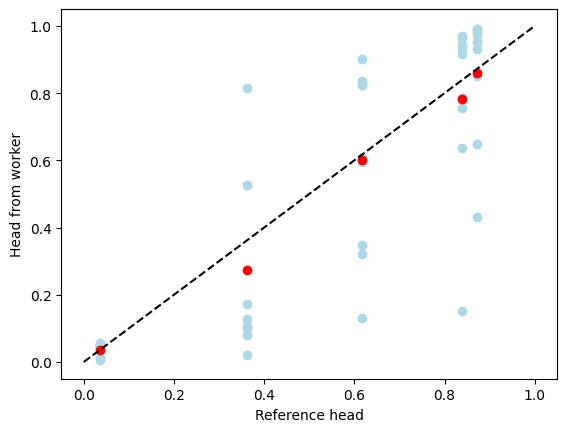

In [43]:
# compare results
h_ref = pd.read_csv("reference/head_obs_ref.csv", index_col=0)

h_all = pd.DataFrame()
for i in range(1, 10):
    h = pd.read_csv(f"worker{i}/head_obs.csv", index_col=0)
    plt.scatter(h_ref.values, h.values, alpha=1, c="lightblue", zorder=1)
    h_all = pd.concat([h_all, h], axis=0)

# plot mean
h_mean = h_all.groupby(h_all.index).mean()
plt.scatter(h_ref.values, h_mean.values, color="red", label="Mean from workers")


plt.plot([0, 1], [0, 1], color="black", linestyle="--")
plt.xlabel("Reference head")
plt.ylabel("Head from worker")

: 